In [5]:
import requests
from bs4 import BeautifulSoup as bs
import numpy as np
import pandas as pd

In [8]:
from time import sleep

titles_list = []

print("crawling...")
for page_index in range(308):
    url = "http://ncov.mohw.go.kr/tcmBoardList.do?pageIndex={}".format(str(page_index))
    while True:
        try:
            response = requests.get(url)
            break
        except:
            print('sleeping...')
            time.sleep(5)
    if response.status_code == 200:
        html = response.text
        soup = bs(html, 'html.parser')
        titles = [a.get_text() for a in soup.select('#content > div > div.board_list > table > tbody > tr > td.ta_l > a')]
        titles_list.extend(titles)
        # print(titles)
    else:
        print(response.status_code)

print("end!")



crawling...
end!


In [9]:
dict_words_list = []
dict_words_global = {}
keywords = set()

for words in words_list:
    dict_words = {}
    for word in words:
        dict_words.setdefault(word, 0)
        dict_words_global.setdefault(word, 0)
        dict_words[word] += 1
        dict_words_global[word] += 1
        keywords.add(word)
    dict_words_list.append(dict_words)

dict_words_global

{'코': 508,
 '로': 566,
 '나': 525,
 '1': 1174,
 '9': 684,
 ' ': 6466,
 '국': 595,
 '내': 557,
 '발': 556,
 '생': 555,
 '및': 522,
 '예': 680,
 '방': 795,
 '접': 726,
 '종': 727,
 '현': 555,
 '황': 534,
 '(': 732,
 '.': 1500,
 '3': 277,
 ')': 732,
 ',': 571,
 '0': 522,
 '시': 392,
 '기': 390,
 '준': 288,
 '[': 210,
 '보': 109,
 '도': 161,
 '설': 56,
 '명': 112,
 '자': 169,
 '료': 101,
 ']': 210,
 '한': 71,
 '일': 343,
 '재': 13,
 '택': 2,
 '치': 25,
 '확': 43,
 '진': 48,
 '용': 19,
 '가': 92,
 '키': 1,
 '트': 9,
 '공': 20,
 '급': 20,
 '관': 81,
 '련': 52,
 '2': 519,
 '카': 170,
 '드': 179,
 '뉴': 171,
 '스': 207,
 '의': 75,
 '노': 9,
 '인': 53,
 '여': 43,
 '복': 44,
 '지': 105,
 '역': 177,
 '리': 309,
 '를': 26,
 '강': 28,
 '화': 58,
 '합': 35,
 '니': 90,
 '다': 101,
 '수': 146,
 '권': 84,
 '증': 53,
 '에': 65,
 '따': 6,
 '른': 5,
 '긴': 4,
 '대': 211,
 '응': 24,
 '계': 100,
 '획': 4,
 '상': 105,
 '반': 28,
 '고': 31,
 '령': 21,
 '층': 17,
 '위': 68,
 '험': 8,
 '군': 7,
 '추': 39,
 '필': 10,
 '요': 34,
 '정': 185,
 '례': 136,
 '브': 237,
 '핑': 233,
 '·': 36,
 '단': 

In [ ]:
df = pd.DataFrame(data=[[0]*len(keywords)]*len(dict_words_list), index=range(0,len(dict_words_list)), columns=sorted(keywords))

In [ ]:
for i, dict_words in enumerate(dict_words_list):
    for keyword, value in dict_words.items():
        df.loc[i,keyword] = value
df

,AZ,COOV,COVID,D,F,G,Guide,HAISHEN,IRB,Interim,JTBC,K,KBS,LDS,MAYSAK,MBC,MBN,MOU,PC,PCR,QR,R,SBS,T,TF,TV,WHO,YTN,kit,mRNA,nCoV,p,가계약,가구,가까이,가능,가능성,가동,가속,가을,...,화이자,확,확대,확보,확산,확인,확정,확진,확충,환경,환기,환자,활,활동,활성화,활용,황실,회,회복,회분,회사원,회식,회안,회의,획득,효과,효율,후,후베이성,후보,후속,후원,후유증,훈련,휴가,휴식,흡연,희망,희박,힘
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3058,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3059,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3060,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3061,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
!ls
from google.colab import files
from google.colab import drive
drive.mount('/gdrive')

sample_data
Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
# !ls /gdrive/MyDrive
df.to_csv("/gdrive/MyDrive/데이터 분석/withCorona.csv", index=False)

In [ ]:
df = pd.read_csv("/gdrive/MyDrive/데이터 분석/withCorona.csv")
keywords = df.columns

keywords, df

(Index(['AZ', 'COOV', 'COVID', 'D', 'F', 'G', 'Guide', 'HAISHEN', 'IRB',
        'Interim',
        ...
        '후속', '후원', '후유증', '훈련', '휴가', '휴식', '흡연', '희망', '희박', '힘'],
       dtype='object', length=1556),
       AZ  COOV  COVID  D  F  G  Guide  HAISHEN  ...  후유증  훈련  휴가  휴식  흡연  희망  희박  힘
 0      0     0      0  0  0  0      0        0  ...    0   0   0   0   0   0   0  0
 1      0     0      0  0  0  0      0        0  ...    0   0   0   0   0   0   0  0
 2      0     0      0  0  0  0      0        0  ...    0   0   0   0   0   0   0  0
 3      0     0      0  0  0  0      0        0  ...    0   0   0   0   0   0   0  0
 4      0     0      0  0  0  0      0        0  ...    0   0   0   0   0   0   0  0
 ...   ..   ...    ... .. .. ..    ...      ...  ...  ...  ..  ..  ..  ..  ..  .. ..
 3058   0     0      0  0  0  0      0        0  ...    0   0   0   0   0   0   0  0
 3059   0     0      0  0  0  0      0        0  ...    0   0   0   0   0   0   0  0
 3060   0     0      0  0

In [ ]:
!pip install networkx

In [ ]:
from tqdm import tqdm

dataset = df.copy()
column_list = dataset.columns
word_length = len(column_list)

count_dict = {}

for doc_number in tqdm(range(len(dataset)), desc='단어쌍 만들기 진행중'):
  tmp = dataset.loc[doc_number] # 현재 문서의 단어 출현 빈도 데이터를 가져온다. 
  for i, word1 in enumerate(column_list): 
    if tmp[word1]: # 현재 문서에 첫번째 단어가 존재할 경우 
      for j in range(i + 1, word_length): 
        if tmp[column_list[j]]: # 현재 문서에 두번째 단어가 존재할 경우 
          count_dict[column_list[i], column_list[j]] = count_dict.get((column_list[i], column_list[j]), 0) + max(tmp[word1], tmp[column_list[j]])

# count_list에 word1, word2, frequency 형태로 저장할 것이다.
count_list = []

for words in count_dict:
    count_list.append([words[0], words[1], count_dict[words]])

# 단어쌍 동시 출현 빈도를 DataFrame 형식으로 만든다.
df = pd.DataFrame(count_list, columns=["word1", "word2", "freq"])
df = df.sort_values(by=['freq'], ascending=False)
df = df.reset_index(drop=True)

# 이 작업이 오래 걸리기 때문에 csv파일로 저장 후 사용하는 것을 추천한다.
df.to_csv('/gdrive/MyDrive/데이터 분석/networkx.csv', encoding='utf-8-sig')


단어쌍 만들기 진행중: 100%|██████████| 3063/3063 [02:09<00:00, 23.66it/s]


In [ ]:
df

,word1,word2,freq
0,국내,발생,1716
1,발생,현황,1716
2,국내,현황,1714
3,감염증,코로나바이러스,1087
4,국내,코로나바이러스,843
...,...,...,...
28039,수,의무,1
28040,수,안착,1
28041,수,안내,1
28042,마스크,지속,1


In [ ]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq
!sudo fc-cache -fv

/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 31 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [ ]:
# 폰트 설정을 위한 font_manager import 
%matplotlib inline
import matplotlib as mpl
import matplotlib.font_manager as fm 
import matplotlib.pyplot as plt

mpl.rcParams['axes.unicode_minus'] = False

print ('버전: ', mpl.__version__)
print ('설치 위치: ', mpl.__file__)
print ('설정 위치: ', mpl.get_configdir())
print ('캐시 위치: ', mpl.get_cachedir())
print([(f.name, f.fname) for f in fm.fontManager.ttflist if 'Nanum' in f.name])

path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=path, size=18).get_name()

버전:  3.2.2
설치 위치:  /usr/local/lib/python3.7/dist-packages/matplotlib/__init__.py
설정 위치:  /root/.config/matplotlib
캐시 위치:  /root/.cache/matplotlib
[('NanumGothic', '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'), ('NanumMyeongjo Eco', '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoBold.ttf'), ('NanumGothic', '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'), ('NanumBarunpen', '/usr/share/fonts/truetype/nanum/NanumBarunpenR.ttf'), ('NanumGothic', '/usr/share/fonts/truetype/nanum/NanumGothicLight.ttf'), ('NanumGothic Eco', '/usr/share/fonts/truetype/nanum/NanumGothicEcoBold.ttf'), ('NanumMyeongjo', '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf'), ('NanumBarunGothic', '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf'), ('NanumBarunpen', '/usr/share/fonts/truetype/nanum/NanumBarunpenB.ttf'), ('NanumMyeongjo', '/usr/share/fonts/truetype/nanum/NanumMyeongjoExtraBold.ttf'), ('NanumGothic Eco', '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'), ('NanumBarunGothic

In [ ]:
fontprop

'NanumGothic'

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54788 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54889 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45236 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48156 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49373 missing from current font.
  font.set_

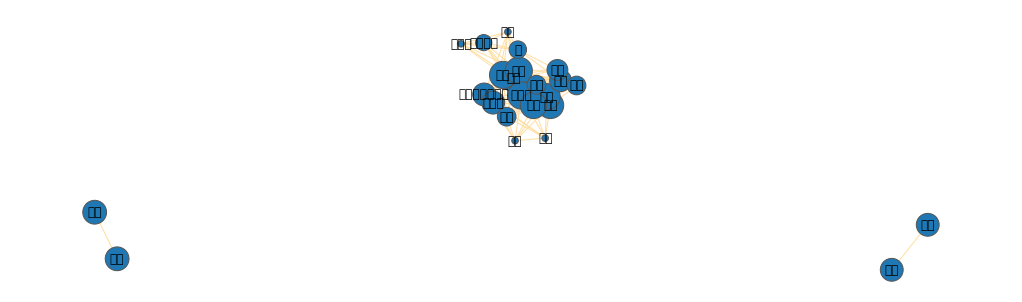

In [ ]:
import networkx as nx
import operator

dataset = df.copy()


G_centrality = nx.Graph()

for ind in range(len(np.where(dataset['freq'] >= 100)[0])):
  G_centrality.add_edge(dataset['word1'][ind], dataset['word2'][ind], weight=int(dataset['freq'][ind]))
  
dgr = nx.degree_centrality(G_centrality)
btw = nx.betweenness_centrality(G_centrality)
cls = nx.closeness_centrality(G_centrality)
egv = nx.eigenvector_centrality(G_centrality)
pgr = nx.pagerank(G_centrality)

sorted_dgr = sorted(dgr.items(), key=operator.itemgetter(1), reverse=True) 
sorted_btw = sorted(btw.items(), key=operator.itemgetter(1), reverse=True) 
sorted_cls = sorted(cls.items(), key=operator.itemgetter(1), reverse=True) 
sorted_egv = sorted(egv.items(), key=operator.itemgetter(1), reverse=True) 
sorted_pgr = sorted(pgr.items(), key=operator.itemgetter(1), reverse=True)

G = nx.Graph()

for i in range(len(sorted_pgr)): 
  G.add_node(sorted_pgr[i][0], nodesize=sorted_dgr[i][1])

for ind in range(len(np.where(dataset['freq'] > 100)[0])):
  G.add_weighted_edges_from([(dataset['word1'][ind], dataset['word2'][ind], int(dataset['freq'][ind]))])

sizes = [G.nodes[node]['nodesize'] * 1000 for node in G]

options = { 'edge_color': '#FFDEA2', 'width': 1, 'with_labels': True, 'font_weight': 'regular' }

fm._rebuild() # 1회에 한해 실행해준다. (폰트 새로고침, 여러번 해줘도 관계는 없다.)

mpl.rc('font', family="NanumGothic")
# plt.figure(figsize=(8, 8))
# plt.rcParams["font.family"] = 'Nanum Brush Script OTF'
# plt.rcParams["font.size"] = 20
plt.rcParams["figure.figsize"] = (14,4)

nx.draw(G, node_size=sizes, pos=nx.spring_layout(G, k=3.5, iterations=100), **options) # font_family로 폰트 등록 
ax = plt.gca()
ax.collections[0].set_edgecolor("#555555") 
plt.show()

In [ ]:
sys_font=fm.findSystemFonts()
nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")
nanum_font

nanum_font number: 31


['/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunpenR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumPen.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunpenB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundEB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEco.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBrush.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundL.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicUltraLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEcoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf',
 '/usr/share/fonts/truetype/nan

In [ ]:
# dict_words_list               # 각 제목으로부터 구한 키워드의 개수
# dict_words_global             # e총 키워드의 개수
', '.join(sorted(keywords))     # 키워드들

'가계약, 가구, 가까이, 가능, 가능성, 가동, 가속, 가을, 가장, 가족, 가지, 가짜, 가해, 각, 각별, 각자, 간, 간담, 간의, 간호, 간호사, 갈림길, 감사, 감소, 감시, 감염, 감염병, 감염증, 강도, 강력, 강조, 강화, 개, 개국, 개발, 개방, 개별, 개산, 개선, 개설, 개소, 개소식, 개시, 개월, 개인, 개인정보, 개정, 개정안, 개최, 개편, 개학, 객, 거듭, 거리, 거부, 거점, 거주, 건, 건강, 걸음, 검, 검사, 검역, 검진, 것, 게놈, 겨울철, 격려, 격리, 격상, 결과, 결정, 결혼식, 결혼식장, 겸, 경, 경감, 경계, 경과, 경기, 경기도, 경로, 경보, 경북, 경산, 경산시, 경영, 경우, 경정, 경제, 경조사, 경향신문, 경험, 계, 계간, 계망, 계속, 계약, 계층, 계획, 고, 고교, 고도화, 고량, 고려, 고령, 고발, 고액, 고지원, 고통, 고향, 곳곳, 곳도, 공, 공간, 공감, 공개, 공공, 공공시설, 공급, 공단, 공동, 공모, 공무원, 공백, 공용, 공유, 공익, 공인, 공적, 공조, 공존, 공중보건, 공청회, 과학, 관, 관계, 관광, 관광지, 관련, 관리, 관심, 광복절, 광주, 교류, 교민, 교사, 교육, 교직원, 교차, 교통, 교환, 교회, 구, 구매, 구성, 구성원, 구축, 국가, 국가대표팀, 국군, 국내, 국립, 국립대, 국민, 국민연금, 국민일보, 국방부, 국산, 국외, 국제, 국회, 군, 군의관, 궁금증, 권, 권고, 권리, 권역, 권역별, 권준, 귀국, 귀성, 규명, 규모, 규제, 균형, 그대로, 극복, 근거, 근로자, 근무, 근육통, 글로벌, 금, 금액, 금연, 금융, 금일, 금지, 급여, 기, 기간, 기관, 기기, 기대, 기록, 기반, 기본, 기부, 기술, 기억, 기업, 기와, 기준, 기지역, 기초, 기회, 긴급, 긴장, 긴장감, 길, 길라잡이, 길이, 길잡이, 김강, 김응수, 김포시, 꼭, 끝, 나기, 날씨, 남, 내, 내일, 네, 네이버, 노고, 노래, 노래방, 노력, 노바

In [ ]:
stop_words = [
              '가까이','각','간','간의','개','개월','건','검','것','겸','경','곳도','구','기',''
]

# New Section

In [ ]:
err = ["백신접종을", "예방접종부터", "까지", "추진합니다", "다람쥐", "하늘다람쥐", "정진하려", "정진하겠습니다", "가능해집니다", "내딛습니다", "중요합니다", "감염예방을"]
for e in err:
    # fixed = ''.join(re.findall("*[^을부터합니다]", e))
    fixed = re.findall(".*[^의은는을를이가부터합니다하겠습니다까지또는]", e)
    print(fixed)

In [ ]:
!pip install konlpy

     |████████████████████████████████| 19.4 MB 54.9 MB/s 
     |████████████████████████████████| 86 kB 5.5 MB/s 
     |████████████████████████████████| 448 kB 29.7 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [ ]:
tagger = Okt() # 형태소별 분류
str1 = "안녕하세요 반갑습니다 저는 누구라고 합니다."
part_of_speech = tagger.pos(str1)
print(part_of_speech)

noun_list = tagger.nouns(str1)
print(noun_list)

[('안녕하세요', 'Adjective'), ('반갑습니다', 'Adjective'), ('저', 'Noun'), ('는', 'Josa'), ('누구', 'Noun'), ('라고', 'Josa'), ('합니다', 'Verb'), ('.', 'Punctuation')]
['저', '누구']
